In [1]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from torch.utils import data
from PIL import Image
from torchvision import transforms
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
import skimage.io as io

In [4]:
import numpy as np

In [5]:
img_skimage = io.imread('D:/李宏毅/ml2020spring-hw3/food-11/training/0_1.jpg')
print(img_skimage.shape)

(512, 512, 3)


In [6]:
tensor_skimage = torch.from_numpy(np.transpose(img_skimage, (2, 0, 1)))

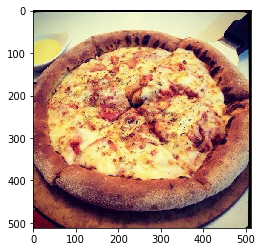

In [7]:
plt.imshow(img_skimage)

In [26]:
# If we want to install CUDA, each part of the model should be transferred to CUDA by .cuda()

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 3,
                out_channels = 48,
                kernel_size = 5,
                stride = 1,
                padding = 2, # (5- 1) /2, the size of images will not changed
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(48, 96, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(96, 192, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(3),
        )
        # self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        # return x.size(1)
        output_frame = nn.Linear(x.size(1), 11) # .cuda()
        output = output_frame(x)
        return output, x

In [27]:
cnn = CNN()
# cnn = cnn.cuda()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 48, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(48, 96, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
)


In [58]:
transform = transforms.Compose([
     transforms.ToTensor(),  # 将图片转换为Tensor,归一化至[0,1]
    # transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5])  # 标准化至[-1,1]
])


#定义自己的数据集合
class FlameSet(data.Dataset):
    '''def One_Hot(y, Length = 11):
        Result = np.zeros(Length)
        for i in range(Length):
            Result[i] = 1 if i == y else 0
        return torch.tensor(Result)'''
    
    def __init__(self,root):
        # 所有图片的绝对路径
        imgs = np.array(os.listdir(root)) # List does not support indexing in the future steps
        perm = torch.randperm(len(train_data))
        perm = np.array(perm)
        imgs = imgs[perm][:500]
        self.imgs = [os.path.join(root,k) for k in imgs]
        self.transforms = transform

    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = int(img_path.split('/')[-1].split('\\')[-1].split('_')[0])
        # label = FlameSet.One_Hot(label)
        pil_img = Image.open(img_path)
        if self.transforms:
            data = self.transforms(pil_img)
        else:
            pil_img = np.asarray(pil_img)
            data = torch.from_numpy(pil_img)
        return data, label

    def __len__(self):
        return len(self.imgs)

train_data=FlameSet('D:/李宏毅/ml2020spring-hw3/food-11/training')
print(train_data[0])

(tensor([[[0.8510, 0.8039, 0.7686,  ..., 0.4706, 0.4902, 0.4980],
         [0.8353, 0.7882, 0.7490,  ..., 0.5020, 0.5137, 0.4784],
         [0.9373, 0.8863, 0.8157,  ..., 0.5020, 0.5294, 0.4824],
         ...,
         [0.6902, 0.6706, 0.6627,  ..., 0.4000, 0.3922, 0.3922],
         [0.6745, 0.6784, 0.6863,  ..., 0.4078, 0.4118, 0.4118],
         [0.6667, 0.6745, 0.6824,  ..., 0.4000, 0.4078, 0.4078]],

        [[0.7843, 0.7333, 0.7020,  ..., 0.3137, 0.3333, 0.3412],
         [0.7725, 0.7255, 0.6863,  ..., 0.3451, 0.3569, 0.3216],
         [0.8784, 0.8275, 0.7608,  ..., 0.3451, 0.3725, 0.3255],
         ...,
         [0.3804, 0.3608, 0.3529,  ..., 0.1686, 0.1725, 0.1725],
         [0.3569, 0.3608, 0.3725,  ..., 0.1804, 0.1725, 0.1725],
         [0.3490, 0.3569, 0.3686,  ..., 0.1725, 0.1686, 0.1686]],

        [[0.6667, 0.5843, 0.4980,  ..., 0.1725, 0.1922, 0.2000],
         [0.6706, 0.5843, 0.4863,  ..., 0.2039, 0.2157, 0.1804],
         [0.7961, 0.7059, 0.5765,  ..., 0.2039, 0.2314, 0

In [59]:
# print(len(train_data))

500


In [60]:
epoch = 10
batch_size = 1 # The images in each batch should have the same size!
lr = 0.1

In [61]:
optimizer = torch.optim.Adam(cnn.parameters(), lr = lr)
loss_func = nn.CrossEntropyLoss()

In [62]:
# perm = torch.randperm(len(train_data))
# print(np.array(perm))
# train_data_2 = train_data[np.array(perm)] # Wrong!

[286 205 391 140 451 428 395 343 386 467 201 364 371 273  86  21 350 235
 339 154 212 488 420 315  88 464 314 368 127 225 348  71 424 233 142 230
 192 265 338  73 419  74 186 414  48 103 122 110 326  90 452 444 381 438
 119  28  70 215 422 165 354  95   5 144 455 399  18 417  37 435 253 158
 329 342 379 432 437  52 323 113 445 356 453  54 247 396   4 363 313 135
  31 427 302 373 262 304 117 456 134 447  96 128 480 214 375 138  59  46
 176 484 275 129 307 217  82 234 162  61 394 303  26  94 389 204 250 249
  67 199 355 403  20 189 156 404 377 238 337  34 169 333  19 132   3 108
 310 332 431 177   9  32   0 309 380 382 268   1 366 228 216  63 102 112
 470 446   7 496 288 114  23  98 409 497 279  76 202 218 317 296 423  38
 413 170  10  92 495 278 425 474 210 416  58  60 388 255 206 185 221 316
 471 264 362 352 261 126 347 345 346  17 374 277 236 269 299 398  79  16
 341  13 283 270 331 311  41 107  11 164 239 166  42 485 450 180 460 287
  50 295 440  80 284 385  72 280 412  27 256  93 24

In [64]:
train_loader = Data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)

In [15]:
# print(os.listdir('D:/李宏毅/ml2020spring-hw3/food-11/training'))

In [53]:
# A = os.listdir('D:/李宏毅/ml2020spring-hw3/food-11/training')
# A[0:500]

SyntaxError: invalid syntax (<ipython-input-53-41c0c6099cb8>, line 2)

In [17]:
# A.split('_')[0]

In [18]:
# A = '10_103.jpg'
# float(A.split('_')[0])

In [19]:
# np.zeros(10)
# torch.tensor(np.zeros(10))

In [ ]:
for epoch_current in range(epoch):
    Sum = 0
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)# .cuda()
        b_y = Variable(y)# .cuda() # No need to do one-hot!
        print(b_x.size()) 
        # print(b_y) 
        # print(b_y.size())
        
        output = cnn(b_x)[0]
        # print(output)
        # output = output.view(output.size(0))
        loss = loss_func(output, b_y)
        Sum += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
    print(Sum)

torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 768, 1024])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 307, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 306, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 382, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 289, 512])
torch.Size([1

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 754, 1000])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 389, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 683, 1024])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 306])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 725, 1024])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size(

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 433, 500])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 382, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 289])
torch.Size([1, 3, 289, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 339, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 444])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 768, 1024])
torch.Size([1, 3, 512, 512])
torch.Size([1

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 375, 500])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 306])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 343, 512])
torch.Size([1, 3, 768, 1024])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 1024, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 306, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 341])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 339, 512])
torch.Size([1, 3, 480, 1024])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 341, 512])
torch.Size([1, 3, 1200, 1600])
torch.Size([1, 3, 512, 512])
torch.Siz

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 307, 512])
torch.Size([1, 3, 341, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 1200, 1600])
torch.Size([1, 3, 382, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 510])
torch.Size([1, 3, 684, 1300])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 382, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 480, 1024])
torch.Size([1, 3, 382, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 384, 512])
torch.Size

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 306])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 340, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 341, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 384, 512])
torch.Size([1, 3, 341, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 306, 512])
torch.Size([1, 3, 512, 384])
torch.Size([1, 3, 306, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 382])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 683, 1024])
torch.Size([1, 3, 384, 512])
torch.Size([1

torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 1200, 1600])


In [ ]:
# train_data[10][0].shape

In [74]:
''' for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        print(cnn(b_x))'''

RuntimeError: Given groups=1, weight of size [16, 1, 5, 5], expected input[1, 3, 306, 512] to have 1 channels, but got 3 channels instead